# Maximum-likelihood estimate for mean lifetime in radiactive decay

Solve the tasks below.
For each task, give reasons for your solution by commenting in the notebook.
In conclusion, summarize your findings and contextualize them. What have you learned? Do the results make sense?

Your results will be examined for plagiarism. Please use your own plot styles, articulate your own thoughts, and present your own experimental approaches.

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


In [39]:
import numpy as np
import matplotlib.pyplot as plt

### Solution
#### a) To show that $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$
The likely function is the product of the probability densities for each $t_i$: $L(t,\vec{\lambda})=\prod_{i=1}^n f(t_i, \vec{\lambda})=\prod_{i=1}^n \frac{1}{\tau}e^{-t_i/\tau}$. Numerically, it is often advantageous to use the logarithm of the likelihood function, the log-likelihood function: $\ln L(\tau)=\sum_{i=1}^n \ln f(t_i,\vec{\lambda})=-n\ln \tau-\frac{1}{\tau}\sum_{i=1}^n t_i$

The maximum likelihood principle now states that the best estimate $\vec{\lambda_{ML}}$ for the parameters $\lambda_{ML}$ is the one that maximizes the likelihood function: $\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$

The standard deviation of $\hat \tau$ can be estimated as $\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$, thus we calculate the partial derivatives of Log-likelyhood function:

$$\frac{\partial \ln L(\tau)}{\partial \tau}=\frac{1}{\tau^2}(\sum_{i=1}^n t_i - n\tau) \qquad \frac{\partial^2 \ln L(\tau)}{\partial^2 \tau}=\frac{1}{\tau^3}(n\tau-2\sum_{i=1}^n t_i)$$
put $\hat{\tau}$ into the 2. derivative we get:
$$\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau}=-\frac{1}{\hat{\tau}^3}\sum_{i=1}^nt_i \qquad \sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$$


### b) Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation

[3.16918702 0.51952601 0.12528939 3.83610933 1.7324407  0.06795252
 1.26097974 0.36213475 2.47692727 2.41328744 0.68710008 3.45503062
 2.69083288 2.38423908 2.11690567 2.3941176  6.36593214 2.09198473
 0.20500267 1.73681641 2.95528019 2.53798213 0.02821953 0.31139248
 3.56375656 0.89513766 0.85567168 0.90992347 0.77777053 3.0050604 ]


C:\Users\shiy0\AppData\Local\Temp\ipykernel_18364\2997077165.py:52: RuntimeWarning: divide by zero encountered in log
  plt.plot(range1, np.log(likelihood2(range1)), label='log-likelihood function 300')


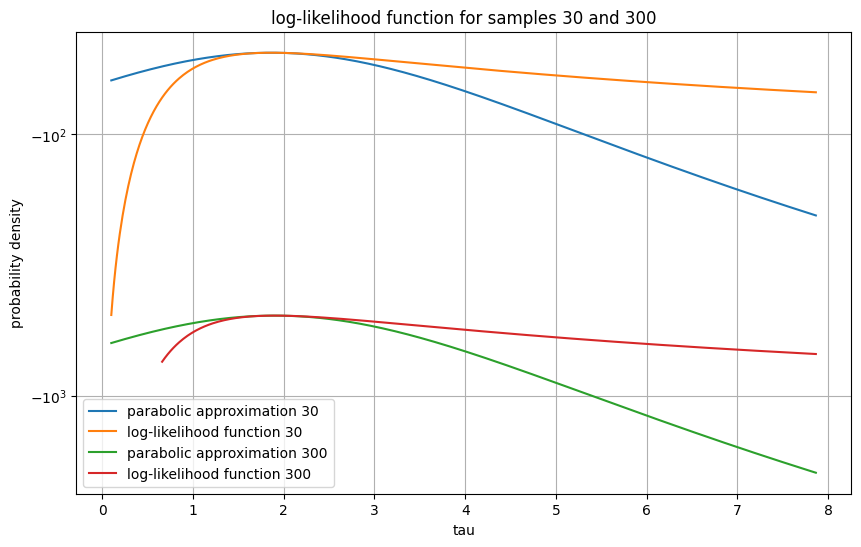

In [41]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

tau = 2
# data set with 30 samples
n1 = 30
samples1 = generate_data(tau, n1)
tau_ml1 = 1/n1 * np.sum(samples1)                          # ML estimator
L_max1 = np.prod(1/tau_ml1 * np.exp(-samples1/tau_ml1))    # L_max likelihood function
sigma1 = tau_ml1 / np.sqrt(n1)                             # sigma
print(samples1)

# parabolic approximation
def parabolic(t):
    return np.log(L_max1) - (t - tau_ml1)**2 / (2 * sigma1**2)

# likelihood function
def likelihood(t_values):
    likelihoods = []
    for t in t_values:
        likelihoods.append(np.prod(1/t * np.exp(-samples1/t)))       # t is a vector
    return np.array(likelihoods)

# Plot
range1 = np.linspace(0.1, tau_ml1 + 6, 500)
plt.figure(figsize=(10,6))
plt.yscale('symlog')
plt.plot(range1, parabolic(range1), label='parabolic approximation 30')
plt.plot(range1, np.log(likelihood(range1)), label='log-likelihood function 30')
plt.title('log-likelihood function for samples 30 and 300')

# data set with 300 samples
n2 = 300
samples2 = generate_data(tau, n2)
tau_ml2 = 1/n2 * np.sum(samples2)                          # ML estimator
L_max2 = np.prod(1/tau_ml2 * np.exp(-samples2/tau_ml2))    # L_max likelihood function
sigma2 = tau_ml2 / np.sqrt(n2)                             # sigma

# parabolic approximation
def parabolic2(t):
    return np.log(L_max2) - (t - tau_ml2)**2 / (2 * sigma2**2)

# likelihood function
def likelihood2(t_values):
    likelihoods2 = []
    for t in t_values:
        likelihoods2.append(np.prod(1/t * np.exp(-samples2/t)))       # t is a vector
    return np.array(likelihoods2)

# Plot
plt.plot(range1, parabolic2(range1), label='parabolic approximation 300')
plt.plot(range1, np.log(likelihood2(range1)), label='log-likelihood function 300')
plt.xlabel('tau')
plt.ylabel('probability density')
plt.legend()
plt.grid(True)
plt.show()

Graphically, it can be observed that both the log-likelihood function and the parabolic approximation reach a maximum at approximately $\hat{\tau} \approx 2$ for the samples of size 30 and 300. Compared to the case with 30 samples, the parabolic fit function provides a better match to the log-likelihood function due to the reduction in statistical uncertainty. Additionally, it is noticeable that both functions appear overall flatter for the 300 samples, which can be mathematically attributed to the formula of the log-likelihood function: the larger the value of \( n \), the smaller \( \ln L(\lambda) \) must be, and consequently, the probability density.

#### c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?

In [48]:
# generate one data set with 500 samples for tau=2
tau = 2                        # true value of tau
n = 500

total=[]
for i in range(1000):
    samples_i = generate_data(tau, n)
    tau_ml_i = 1/n * np.sum(samples_i)                             # ML estimator
    L_max_i = np.prod(1/tau_ml_i * np.exp(-samples_i/tau_ml_i))    # L_max likelihood function
    sigma_i = tau_ml_i / np.sqrt(n)                                # sigma

    Aussage = tau_ml_i-sigma_i<=2 and tau_ml_i+sigma_i>=2
    if Aussage:
        total.append(1)
    else:
        total=total

#print(total)
print(len(total)/1000)

0.688


This result aligns with the expectation based on the properties of the normal distribution. Specifically, for large sample sizes, the maximum likelihood estimate $\hat{\tau}$ follows a normal distribution ceantered around the true value of $\tau$ with a standard deviation $\sigma_{\hat{\tau}}$ (as we learned in the central limit theorem). In a normal distribution, approximately 66.8% of the values lie within one standard deviation of the mean. Our computed result of 68.8% is very close to this a expectation.